# 1. Apply image segmentation masks

Below are several exercises that use image masks such as those generated in an image segmentation task.

1. Write a Python function `apply_mask` that takes a colour image stored in 3 RGB channels and an image mask using the trimap format. That is, the mask is a Numpy array with integer values 1, 2, 3. The function will return a new 3-channel colour image that applies the mask so that:
   - All pixels whose corresponding mask is 1 (object) remain unmodified.
   - All pixels whose corresponding mask is 2 (background) have their value 0.
   - All pixels whose corresponding mask is 3 (contour) have their value halved.
   
   Below is an example of execution.

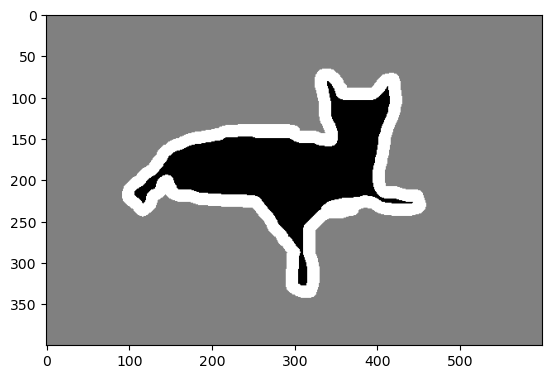

In [ ]:
mask = plt.imread("Abyssinian_1.png")
mask = ((mask - mask.min())/(mask.max() - mask.min())*2).astype("uint8") + 1
plt.imshow(mask, cmap="gray")

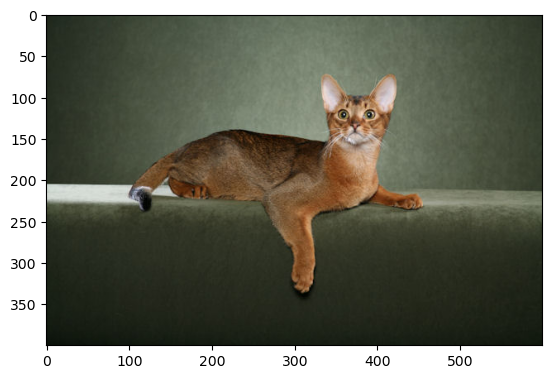

In [ ]:
from matplotlib import pyplot as plt

image = plt.imread("Abyssinian_1.jpg")
plt.imshow(image)

In [ ]:
import numpy as np

def apply_mask(image, mask):
    """Return a masked image"""
    result = np.zeros(image.shape).astype("uint8")
    for x, x_i in enumerate(image):
        for y, y_i in enumerate(x_i):
            if mask[x,y] == 1:
                # object
                result[x,y] = y_i
            elif mask[x,y] == 2:
                # background
                result[x,y] = [0,0,0]
            else:
                # contour
                result[x,y] = y_i / 2
    return result

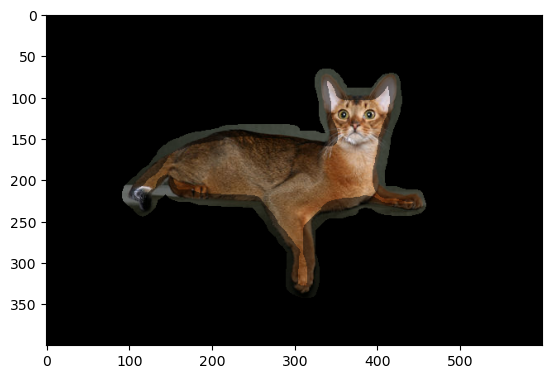

In [ ]:
masked_image = apply_mask(image,mask)
plt.imshow(masked_image)

2. Write a Python function `add_alpha` that takes an image in 3 RGB channels and a trimap mask as described in the previous question, and creates a 4-channel image where the RGB channels are the same as the original image, and the alpha channel is based on the trimap mask so that:
     - If the mask value is 1, the alpha channel value is 255 (opaque content).
     - If the mask value is 2, the alpha channel value is 0 (transparent background).
     - If the mask value is 3, the alpha channel value is 128 (semi-transparent contour).

In [ ]:
from matplotlib import pyplot as plt

image = plt.imread("Abyssinian_1.jpg")
mask = plt.imread("Abyssinian_1.png")
mask = ((mask - mask.min())/(mask.max() - mask.min())*2).astype("uint8") + 1

In [ ]:
def add_alpha(image, mask):
    """Return a 4-channel image"""
    result = np.zeros(image.shape[:2] + (4,)).astype("uint8")
    for x, x_i in enumerate(image):
        for y, y_i in enumerate(x_i):
            result[x,y,:3] = y_i
            if mask[x,y] == 1:
                # object
                result[x,y,3] = 255
            elif mask[x,y] == 2:
                # background
                result[x,y,3] = 0
            else:
                # contour
                result[x,y,3] = 128
    return result

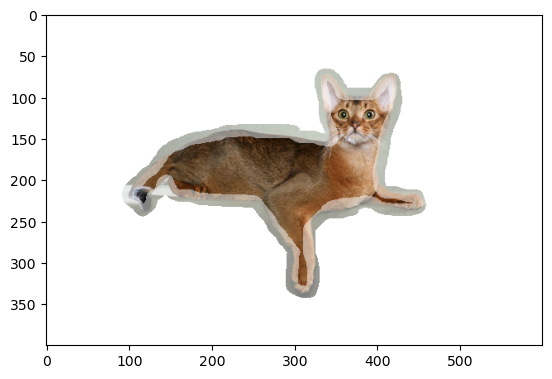

In [ ]:
four_channel_image = add_alpha(image,mask)
plt.imshow(four_channel_image)

# 2. Run a pre-trained image segmentation model

Write a function `predict_image_segmentation` that takes an input image and generates a segmentation mask. To generate the segmentation mask, use these saved pre-trained model weights. These weights were generated and saved using the lecture notebook of week 5:
 - [oxford-segmentation.keras](https://drive.google.com/file/d/1edzzqj0HajoNvZ_XCj3UEnjhK2w-ohvu/view?usp=share_link)

 To be able to use the pre-trained model weights, you need to do the following:
 1. Define the model using exactly the same model definition as in the lecture notebook, with the same input image size. The model was defined in the function `get_model`.
 2. Use the Keras function `load_model` to load the pre-trained model weights.
 3. Use the `predict` method as described in the lecture notebook.
 4. Post-process the prediction so that the output conforms to the format specified in task 1 of this practical.

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow import keras
import numpy as np

image = img_to_array(load_img("Abyssinian_1.jpg", target_size=(200,200)))

2023-08-16 21:15:38.625057: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def predict_image_segmentation(image):
    """Return the predicted segmentation mask"""
    model = keras.models.load_model("oxford_segmentation.keras")
    predictions = model.predict(np.expand_dims(image, 0))[0]
    return np.argmax(predictions, axis=-1) + 1

In [ ]:
predicted_mask = predict_image_segmentation(image)


Metal device set to: AMD Radeon Pro 5500M


2023-08-16 21:15:49.633998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-16 21:15:49.634034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-08-16 21:15:51.272688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


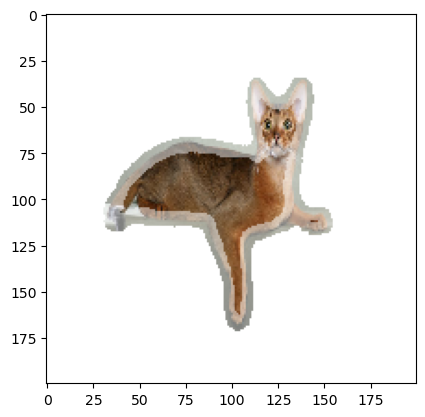

In [ ]:
four_channel_image = add_alpha(image, predicted_mask)
plt.imshow(four_channel_image)